In [1]:
import uproot as up
import awkward as ak
import numpy as np
import hist
import mplhep as hep
import matplotlib.pyplot as plt
plt.style.use(hep.style.CMS)
import vector
vector.register_awkward()

In [2]:
Z_files = ["/home/ananya/Desktop/HEP/prog/A1/ZTo2Nu/ZTo2Nu 40 to 100/5d1da3cc-fc04-4520-96f1-6c4666428180.root",
           "/home/ananya/Desktop/HEP/prog/A1/ZTo2Nu/ZTo2Nu 40 to 100/8a0e2fe2-ea3b-452b-8978-99b0a3baf2db.root",
           "/home/ananya/Desktop/HEP/prog/A1/ZTo2Nu/ZTo2Nu 40 to 100/74d4d086-7feb-44be-a781-5c7a227513eb.root",
           "/home/ananya/Desktop/HEP/prog/A1/ZTo2Nu/ZTo2Nu 40 to 100/737e1825-5ded-4cab-b4d8-840873e7a5b5.root",
           "/home/ananya/Desktop/HEP/prog/A1/ZTo2Nu/ZTo2Nu 40 to 100/739cd189-a7d9-4b12-a145-c3ec75fe381f.root",
           "/home/ananya/Desktop/HEP/prog/A1/ZTo2Nu/ZTo2Nu 40 to 100/2671f15e-7211-4219-a7cb-11c754d2cde5.root",
           "/home/ananya/Desktop/HEP/prog/A1/ZTo2Nu/ZTo2Nu 40 to 100/72839a86-d2f3-422c-84d5-c9250fc46bce.root",
           "/home/ananya/Desktop/HEP/prog/A1/ZTo2Nu/ZTo2Nu 40 to 100/a6165ef7-4222-46d4-937b-2585f67626b6.root",
           "/home/ananya/Desktop/HEP/prog/A1/ZTo2Nu/ZTo2Nu 40 to 100/def8f50e-0862-4edb-80a0-83ef9537c6d8.root",
           "/home/ananya/Desktop/HEP/prog/A1/ZTo2Nu/ZTo2Nu 40 to 100/e156a394-3428-4cf4-9b6c-57e8e4bef231.root",]
    
branches_to_select = ["Jet_pt", "Jet_eta", "Jet_phi","Jet_mass", "Jet_jetId", "Jet_btagDeepFlavB", "MET_pt", "MET_phi"]

Z_arrays = [up.open(f)["Events"].arrays(branches_to_select) for f in Z_files]


all_Z = ak.concatenate(Z_arrays)


In [3]:
all_Z

<Array [{Jet_pt: [...], ...}, ..., {...}] type='2597866 * {Jet_pt: var * fl...'>

In [4]:
z = ak.zip({"pt":all_Z.Jet_pt, "eta":all_Z.Jet_eta, "phi":all_Z.Jet_phi, "mass":all_Z.Jet_mass, "id1":all_Z.Jet_jetId, "id2":all_Z.Jet_btagDeepFlavB, "met_pt":all_Z.MET_pt,"met_phi":all_Z.MET_phi },  with_name = "Momentum4D")
z

<MomentumArray4D [[{pt: 29.7, eta: 1.44, ...}, ...], ...] type='2597866 * v...'>

In [5]:
selected_event_z = z[(z.id1 == 2) & (z.pt >20) & (abs(z.eta)< 2.5)]
selected_event_z = selected_event_z[ak.num(selected_event_z)>0]
selected_event_z

<MomentumArray4D [[{pt: 79.2, eta: 1.05, ...}], ...] type='4506 * var * Mom...'>

In [6]:
selected_event_z_b = z[(z.id1 == 2) & (z.pt >20) & (abs(z.eta)< 2.5) & (z.id2 > 0.3086)]
selected_event_z_b = selected_event_z_b[ak.num(selected_event_z_b)>0]
selected_event_z_b

<MomentumArray4D [[{pt: 39, eta: 1.28, ...}], ...] type='236 * var * Moment...'>

In [24]:
lumi = 8
sigma = 863200
ni = 2597866 
nf1 = 236
f1 = lumi*sigma*nf1/ni
weights1 = (np.ones_like(ak.flatten(selected_event_z_b.pt)))*f1

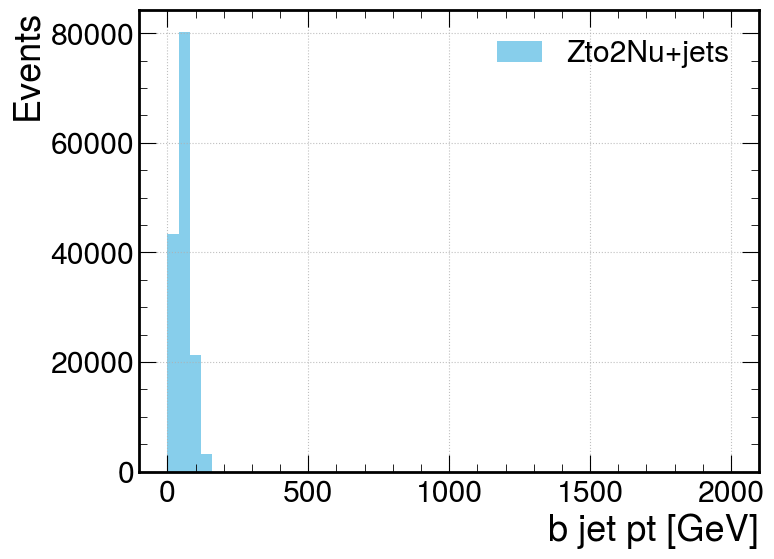

In [25]:
plt.figure(figsize=(8,6))
counts1, bin_edges1, _ = plt.hist(ak.flatten(selected_event_z_b.pt), bins=50, range=(0, 2000), label="Zto2Nu+jets",color='skyblue', weights = weights1)
#counts1, bin_edges1, _ = plt.hist(ak.flatten(selected_event_z_b.pt), bins=50, weights=weights1)
# Labels and legend
plt.xlabel("b jet pt [GeV]")
plt.ylabel("Events")
plt.legend()
plt.grid(True)
#plt.savefig('bjet pt',bbox_inches='tight')
plt.show()


In [26]:
import ROOT

# Create a new ROOT file
f_out = ROOT.TFile("bjet_pt_1.root", "RECREATE")

# Create a ROOT histogram object with the bin edges and counts
hist1 = ROOT.TH1F("b_jet_pt_hist1", "bjet pt", len(bin_edges1)-1, bin_edges1)

# Fill the ROOT histogram with the counts
for i in range(len(counts1)):
    hist1.SetBinContent(i+1, counts1[i])

# Write the histogram to the ROOT file
hist1.Write()
f_out.Close()


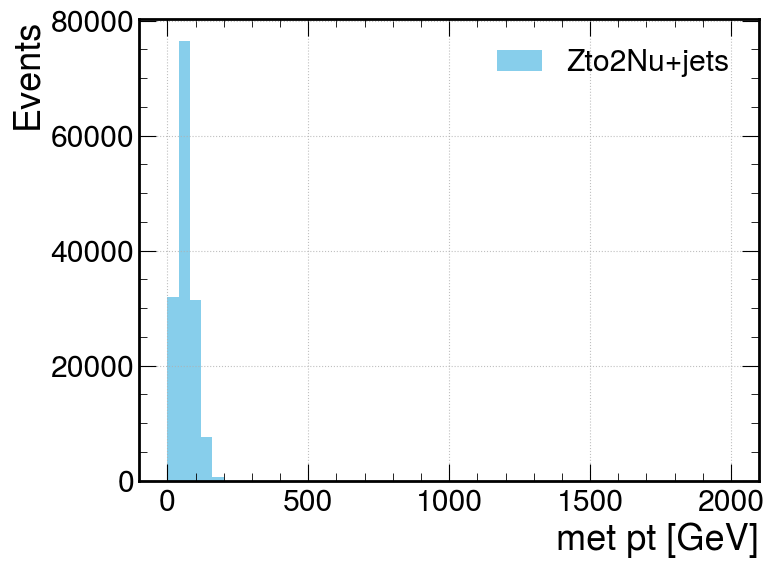

In [27]:
plt.figure(figsize=(8,6))
counts2, bin_edges2, _ = plt.hist(ak.flatten(selected_event_z_b.met_pt), bins=50, range=(0, 2000), label="Zto2Nu+jets",color='skyblue',weights = weights1)
# Labels and legend
plt.xlabel("met pt [GeV]")
plt.ylabel("Events")
plt.legend()
plt.grid(True)
#plt.savefig('met pt',bbox_inches='tight')
plt.show()

In [28]:
import ROOT

# Create a new ROOT file
f_out = ROOT.TFile("met_1.root", "RECREATE")

# Create a ROOT histogram object with the bin edges and counts
hist1 = ROOT.TH1F("hist1", "MET pt", len(bin_edges2)-1, bin_edges2)

# Fill the ROOT histogram with the counts
for i in range(len(counts2)):
    hist1.SetBinContent(i+1, counts2[i])

# Write the histogram to the ROOT file
hist1.Write()
f_out.Close()

In [29]:
z = z[(ak.num(z) >=2)]

sorted_z = z[ak.argsort(z.pt, axis=1, ascending=False)]

# Step 4: Extract leading and subleading
leading_z = sorted_z[:, 0]
subleading_z = sorted_z[:, 1]

# Step 5: Compute invariant mass of dijet system
dijet_mass_z = (leading_z + subleading_z).mass
dijet_pt_z = (leading_z + subleading_z).pt

In [30]:
z

<MomentumArray4D [[{pt: 29.7, eta: 1.44, ...}, ...], ...] type='1778021 * v...'>

In [31]:
print(dijet_mass_z)        
print(leading_z.pt)        
print(subleading_z.pt)    
print(len(dijet_mass_z))
print(dijet_pt_z)
print(len(leading_z.pt))

[92.1, 131, 228, 71.8, 149, 473, 201, ..., 121, 22, 167, 268, 122, 88.9, 22.4]
[29.7, 33.7, 52.8, 49.9, 68.4, 50.5, ..., 39.8, 47.3, 75.4, 27.1, 58.2, 33.2]
[20.5, 30.6, 45.4, 24.8, 58.6, 25, 27, ..., 18, 23.8, 18.6, 22.4, 23.1, 28.7]
1778021
[30, 54.2, 47.4, 25.5, 10.3, 62.4, 103, ..., 57.3, 30.8, 65.7, 44.5, 78.8, 59]
1778021


In [32]:
nf2 = 1778021
f2 = lumi*sigma*nf2/ni
weights2 = (np.ones_like(dijet_mass_z))*f2

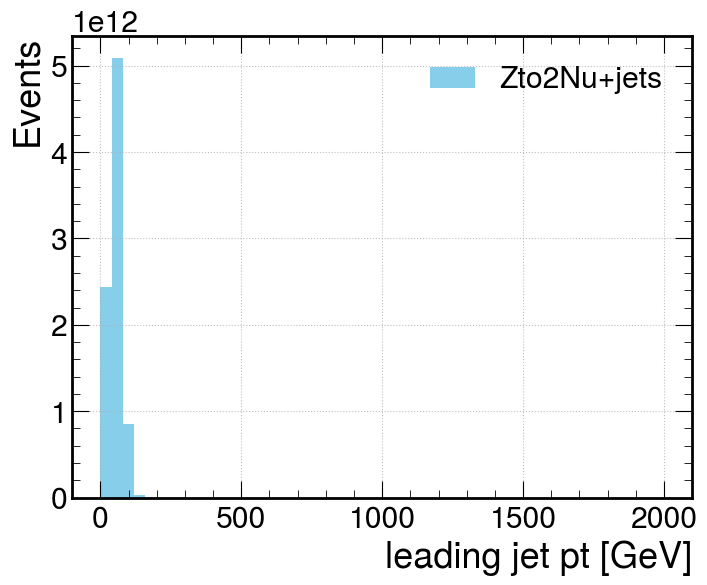

In [33]:
plt.figure(figsize=(8,6))
counts3, bin_edges3, _ = plt.hist(ak.to_numpy(leading_z.pt), bins=50, range=(0, 2000), label="Zto2Nu+jets",color='skyblue',weights = weights2)

# Labels and legend
plt.xlabel("leading jet pt [GeV]")
plt.ylabel("Events")
#plt.title("Jet leading pt distribution: Background")
plt.legend()
plt.grid(True)
#plt.savefig('leading pt',bbox_inches='tight')
plt.show()

In [34]:
import ROOT

# Create a new ROOT file
f_out = ROOT.TFile("leading_pt_1.root", "RECREATE")

# Create a ROOT histogram object with the bin edges and counts
hist1 = ROOT.TH1F("hist1", "Leading_jet_pt", len(bin_edges3)-1, bin_edges3)

# Fill the ROOT histogram with the counts
for i in range(len(counts3)):
    hist1.SetBinContent(i+1, counts3[i])

# Write the histogram to the ROOT file
hist1.Write()
f_out.Close()

AttributeError: module hist has no attribute SetBinContent

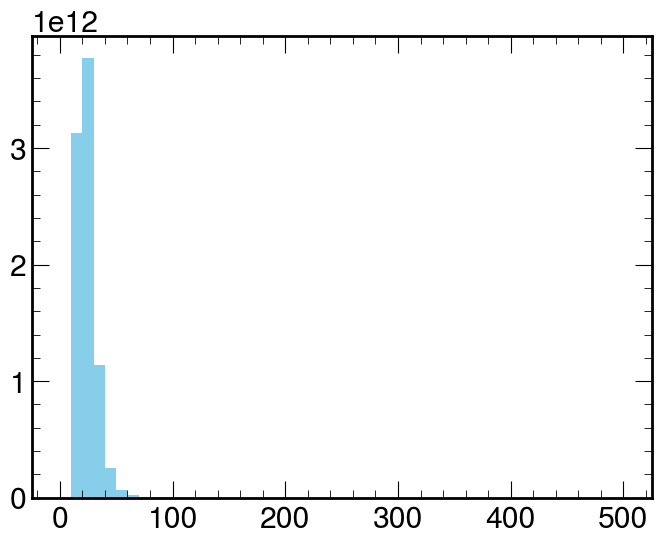

In [41]:
plt.figure(figsize=(8,6))
counts4, bin_edges4, _ = plt.hist(ak.to_numpy(subleading_z.pt), bins=50, range=(0, 500), label="Zto2Nu+jets",color='skyblue',weights = weights2)


# Labels and legend
plt.xlabel("subleading jet pt [GeV]")
plt.ylabel("Events")
#plt.title("Jet leading pt distribution: Background")
plt.legend()
plt.grid(True)
#plt.savefig('leading pt',bbox_inches='tight')
plt.show()

In [43]:
import ROOT

# Create a new ROOT file
f_out = ROOT.TFile("subleading_pt_1.root", "RECREATE")

# Create a ROOT histogram object with the bin edges and counts
hist1 = ROOT.TH1F("hist1", "Subleading_jet_pt", len(bin_edges4)-1, bin_edges4)

# Fill the ROOT histogram with the counts
for i in range(len(counts4)):
    hist1.SetBinContent(i+1, counts4[i])

# Write the histogram to the ROOT file
hist1.Write()
f_out.Close()

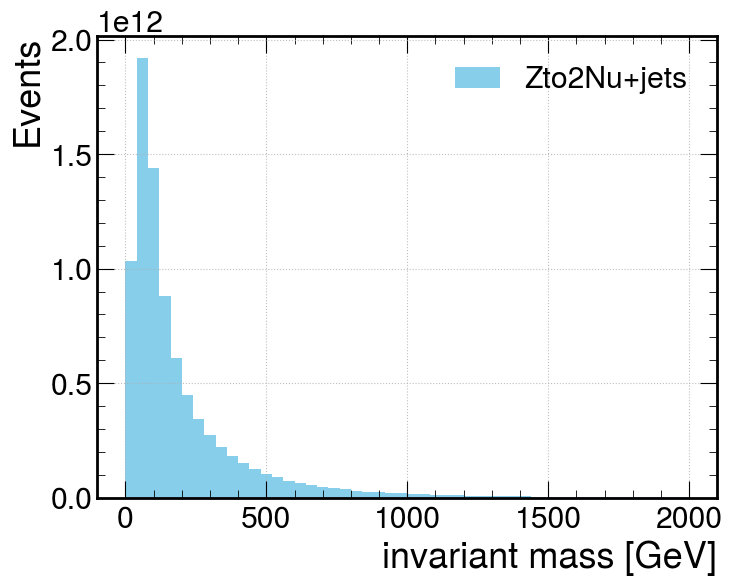

In [37]:
plt.figure(figsize=(8,6))
counts5, bin_edges5,_ = plt.hist(ak.to_numpy(dijet_mass_z), bins=50, range=(0, 2000), label="Zto2Nu+jets",color='skyblue',weights = weights2)

# Labels and legend
plt.xlabel("invariant mass [GeV]")
plt.ylabel("Events")
#plt.title("Jet leading pt distribution: Background")
plt.legend()
plt.grid(True)
#plt.savefig('leading pt',bbox_inches='tight')
plt.show()

In [38]:
import ROOT

# Create a new ROOT file
f_out = ROOT.TFile("mass1.root", "RECREATE")

# Create a ROOT histogram object with the bin edges and counts
hist1 = ROOT.TH1F("hist1", "Invariant mass", len(bin_edges5)-1, bin_edges5)

# Fill the ROOT histogram with the counts
for i in range(len(counts5)):
    hist1.SetBinContent(i+1, counts5[i])

# Write the histogram to the ROOT file
hist1.Write()
f_out.Close()

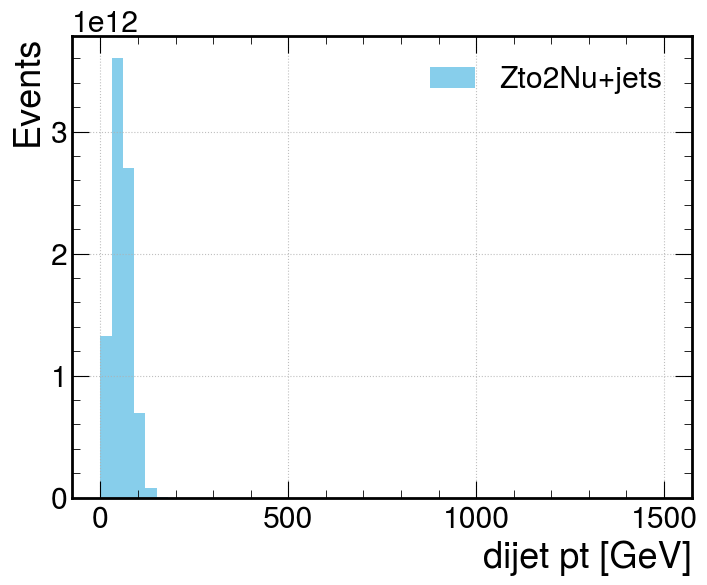

In [39]:
plt.figure(figsize=(8,6))
counts6, bin_edges6,_=plt.hist(ak.to_numpy(dijet_pt_z), bins=50, range=(0, 1500), label="Zto2Nu+jets",color='skyblue',weights = weights2)

# Labels and legend
plt.xlabel("dijet pt [GeV]")
plt.ylabel("Events")
#plt.title("Jet leading pt distribution: Background")
plt.legend()
plt.grid(True)
#plt.savefig('leading pt',bbox_inches='tight')
plt.show()

In [40]:
import ROOT

# Create a new ROOT file
f_out = ROOT.TFile("dijet1.root", "RECREATE")

# Create a ROOT histogram object with the bin edges and counts
hist1 = ROOT.TH1F("hist1", "Dijet pt", len(bin_edges6)-1, bin_edges6)

# Fill the ROOT histogram with the counts
for i in range(len(counts6)):
    hist1.SetBinContent(i+1, counts6[i])

# Write the histogram to the ROOT file
hist1.Write()
f_out.Close()